# ==== A) Calculation: DDG_folding ====

# 01 SAAFEC-SEQ

## 1.1 preview CDKL5 mutation data

In [14]:
import pandas as pd

# Define the file path
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

                                              Name Gene(s) Protein change mutation wild  position mutant                                                                                                                                                                                                           Condition(s)     Accession GRCh37Chromosome  GRCh37Location GRCh38Chromosome  GRCh38Location  VariationID  AlleleID(s)      dbSNP ID             Canonical SPDI               Variant type Molecular consequence                       Germline classification         Source Germline date last evaluated                                Germline review status  ddG_saafecseq_seq  ddg_imutant2_seq  ddg_imutant2_str
0                      ENSP00000369325.3:p.Ile3Phe   CDKL5            I3F      I3F    I         3      F                                                                                                                                                                                     

## 1.2 Prepare mutation list for SAAFEC-SEQ

In [ ]:
# === Part 1: Prepare mutation list ===

import pandas as pd

# --- Configuration ---
excel_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq.xlsx'
sheet_name = 0
mutation_txt = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/01_saafecseq/mutation_list.txt'

# --- Step 1: Load Excel ---
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# --- Step 2: Create Mutation List File ---
mutation_entries = []
mutation_keys = []

for idx, row in df.iterrows():
    wild = str(row['wild']).strip().upper()
    pos = str(row['position']).strip()
    mutant = str(row['mutant']).strip().upper()

    if wild != 'nan' and pos != 'nan' and mutant != 'nan':
        mutation_entries.append(f"{wild} {pos} {mutant}")
        mutation_keys.append(f"{wild}_{pos}_{mutant}")

# Save to mutation_list.txt
with open(mutation_txt, 'w') as f:
    f.write("\n".join(mutation_entries))

print(f"✅ Saved {len(mutation_entries)} mutations to {mutation_txt}")

✅ Saved 156 mutations to /mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/01_saafecseq/mutation_list.txt


## 1.3 Run SAAFEC-SEQ on Palmetto

In [16]:
# run saafec-seq on palmetto
# python saafec-seq.py -i 01_cdkl5_1_960.fasta -f mutation_list.txt -o saafec_result.out -v


# ======================================
#!/bin/bash
#SBATCH --job-name=saafecseq_cdkl5_run
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=40
#SBATCH --mem=128G
#SBATCH --time=24:00:00
#SBATCH --output=saafecseq_%j.log

# Load conda environment
source activate /project/ealexov/compbio/software/py37_webservers

# Navigate to working directory
cd /project/ealexov/compbio/shamrat/250404_saafecseq

# Run SAAFEC-SEQ
python saafec-seq.py -i O76039.fasta -f mutation_list.txt -o saafec_result.out -v

# ===============================================

SyntaxError: invalid decimal literal (486254104.py, line 19)

## 1.4 Update the Excel file with prediction results

In [ ]:
# === Part 3: Update Excel with ddG and Type ===

import pandas as pd

# --- Configuration ---
result_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/01_saafecseq/saafec_result.out'                             # Output from SAAFEC-SEQ
original_excel = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq.xlsx' # Original Excel
updated_excel = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/01_saafecseq/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_saafecseq.xlsx'          # Final updated file

# --- Step 1: Load Prediction Results ---
try:
    result_df = pd.read_csv(result_file, delim_whitespace=True)
except Exception as e:
    print("❌ Failed to read result output:", e)
    exit(1)

# Create mutation_key to match Excel
result_df['mutation_key'] = result_df['Wild'].astype(str).str.upper() + "_" + result_df['Position'].astype(str) + "_" + result_df['Mutant'].astype(str).str.upper()

# --- Step 2: Load Original Excel ---
df = pd.read_excel(original_excel, sheet_name=0)
df['mutation_key'] = df['wild'].astype(str).str.upper() + "_" + df['position'].astype(str) + "_" + df['mutant'].astype(str).str.upper()

# --- Step 3: Merge Data ---
df = df.merge(result_df[['mutation_key', 'ddG', 'Type']], on='mutation_key', how='left')
df.drop(columns=['mutation_key'], inplace=True)

# --- Step 4: Save Updated Excel ---
df.to_excel(updated_excel, index=False)
print(f"📄 Excel updated with SAAFEC-SEQ results: {updated_excel}")


📄 Excel updated with SAAFEC-SEQ results: /mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/01_saafecseq/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_saafecseq.xlsx


# 02 I-MUTANT: Seq & Str [run on colab]
visit: https://colab.research.google.com/drive/1WUJUODGAbV2Ho2OK3jzkzkRGZ8JFEBb_?authuser=1#scrollTo=dfFTwIhkOR9f

In [ ]:
# visit: https://colab.research.google.com/drive/1WUJUODGAbV2Ho2OK3jzkzkRGZ8JFEBb_?authuser=1#scrollTo=dfFTwIhkOR9f

# 03 INPS SEQ
https://inpsmd.biocomp.unibo.it/

## 3.1 LOAD DATA

In [ ]:
import pandas as pd

# Define the file path
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

                                              Name Gene(s) Protein change mutation wild  position mutant                                                                                                                                                                                                           Condition(s)     Accession GRCh37Chromosome  GRCh37Location GRCh38Chromosome  GRCh38Location  VariationID  AlleleID(s)      dbSNP ID             Canonical SPDI               Variant type Molecular consequence                       Germline classification         Source Germline date last evaluated                                Germline review status  ddG_saafecseq_seq  ddg_imutant2_seq  ddg_imutant2_str
0                      ENSP00000369325.3:p.Ile3Phe   CDKL5            I3F      I3F    I         3      F                                                                                                                                                                                     

## 3.2 extract mutation column only

In [ ]:
import pandas as pd

# Load the Excel file
excel_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'
df = pd.read_excel(excel_file)

# Extract the 'mutation' column
mutations = df['mutation'].dropna().astype(str)  # Remove any NaN values, ensure string format

# Save to a text file (one mutation per line)
output_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/03_inps/cdkl5_mutations_only.txt'
mutations.to_csv(output_file, index=False, header=False)

print(f"✅ Mutation list saved to: {output_file}")


✅ Mutation list saved to: /mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/03_inps/cdkl5_mutations_only.txt


## 3.3 Submit '*.txt' mutations as file to  inps seq website


## 3.4 load json file

In [ ]:
import json

# Load the JSON file
with open('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250404_stability_compute/250409_2_inps_seq/result_inpsseq_1_773.json', 'r') as f:
    data = json.load(f)

# Pretty-print the entire JSON structure
import pprint
pprint.pprint(data)


{'accession': 'sp|O76039|CDKL5_HUMAN',
 'sequence': {'len': 960,
              'sequence': 'MKIPNIGNVMNKFEILGVVGEGAYGVVLKCRHKETHEIVAIKKFKDSEENEEVKETTLRELKMLRTLKQENIVELKEAFRRRGKLYLVFEYVEKNMLELLEEMPNGVPPEKVKSYIYQLIKAIHWCHKNDIVHRDIKPENLLISHNDVLKLCDFGFARNLSEGNNANYTEYVATRWYRSPELLLGAPYGKSVDMWSVGCILGELSDGQPLFPGESEIDQLFTIQKVLGPLPSEQMKLFYSNPRFHGLRFPAVNHPQSLERRYLGILNSVLLDLMKNLLKLDPADRYLTEQCLNHPTFQTQRLLDRSPSRSAKRKPYHVESSTLSNRNQAGKSTALQSHHRSNSKDIQNLSVGLPRADEGLPANESFLNGNLAGASLSPLHTKTYQASSQPGSTSKDLTNNNIPHLLSPKEAKSKTEFDFNIDPKPSEGPGTKYLKSNSRSQQNRHSFMESSQSKAGTLQPNEKQSRHSYIDTIPQSSRSPSYRTKAKSHGALSDSKSVSNLSEARAQIAEPSTSRYFPSSCLDLNSPTSPTPTRHSDTRTLLSPSGRNNRNEGTLDSRRTTTRHSKTMEELKLPEHMDSSHSHSLSAPHESFSYGLGYTSPFSSQQRPHRHSMYVTRDKVRAKGLDGSLSIGQGMAARANSLQLLSPQPGEQLPPEMTVARSSVKETSREGTSSFHTRQKSEGGVYHDPHSDDGTAPKENRHLYNDPVPRRVGSFYRVPSPRPDNSFHENNVSTRVSSLPSESSSGTNHSKRQPAFDPWKSPENISHSEQLKEKEKQGFFRSMKKKKKKSQTVPNSDSPDLLTLQKSIHSASTPSSRPKEWRPEKISDLQTQSQPLKSLRKLLHLSSASNHPASSDPRFQPLTAQQTKNSFSEIRIHPLSQASGGSSNIRQEPAPKGRPALQLPGQMD

## 3.4 Add inps seq result into excel

### 3.4.1 : 1-227

In [ ]:
import pandas as pd
import json

# Load  Excel file
df = pd.read_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx')

# Load the INPS-MD result JSON
with open('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/03_inps_seq/inps_seq_1_227.json', 'r') as f:
    json_data = json.load(f)

# Extract mutation records from JSON
variants = json_data['variants']
ddg_records = [{
    'wild': var['wild_type'],
    'position': var['position'],
    'mutant': var['variant'],
    'INPS_DDG': var['ddg']
} for var in variants]

ddg_df = pd.DataFrame(ddg_records)

# Merge without modifying the original columns
merged_df = pd.merge(
    df.copy(),         # do not modify the original DataFrame
    ddg_df, 
    how='left',
    on=['wild', 'position', 'mutant']
)

# Save the updated file
merged_df.to_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/03_inps_seq/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_inps_seq_1_227.xlsx', index=False)

print("✅ Done! Added 'INPS_DDG' to the Excel file.")


✅ Done! Added 'INPS_DDG' to the Excel file.


### 3.4.2: 240 -895

In [ ]:
import pandas as pd
import json

# Load   Excel file
df = pd.read_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/03_inps_seq/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_inps_seq_1_227.xlsx')

# Load the INPS-MD result JSON
with open('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/03_inps_seq/inps_seq_240_895.json', 'r') as f:
    json_data = json.load(f)

# Extract mutation records from JSON
variants = json_data['variants']
ddg_records = [{
    'wild': var['wild_type'],
    'position': var['position'],
    'mutant': var['variant'],
    'INPS_DDG': var['ddg']
} for var in variants]

ddg_df = pd.DataFrame(ddg_records)

# Merge without modifying the original columns
merged_df = pd.merge(
    df.copy(),         # do not modify the original DataFrame
    ddg_df, 
    how='left',
    on=['wild', 'position', 'mutant'
    ]
)

# Save the updated file
merged_df.to_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/03_inps_seq/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_inps_seq_1_227_240_895.xlsx', index=False)

print("✅ Done! Added 'INPS_DDG' to the Excel file.")


✅ Done! Added 'INPS_DDG' to the Excel file.


## 3.5 add inps str result into excel (1-227)

In [ ]:

import pandas as pd
import json

# Load  Excel file
df = pd.read_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx')

# Load the INPS-MD result JSON
with open('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/04_inps_str/inps_str_1_227.json', 'r') as f:
    json_data = json.load(f)

# Extract mutation records from JSON
variants = json_data['variants']
ddg_records = [{
    'wild': var['wild_type'],
    'position': var['position'],
    'mutant': var['variant'],
    'INPS_DDG': var['ddg']
} for var in variants]

ddg_df = pd.DataFrame(ddg_records)

# Merge without modifying the original columns
merged_df = pd.merge(
    df.copy(),         # do not modify the original DataFrame
    ddg_df, 
    how='left',
    on=['wild', 'position', 'mutant'
    ]
)

# Save the updated file
merged_df.to_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/04_inps_str/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_inps_str_1_227.xlsx', index=False)

print("✅ Done! Added 'INPS_DDG' to the Excel file.")



✅ Done! Added 'INPS_DDG' to the Excel file.


## 3.5.1 add inps str result into excel (240-302)

In [ ]:

import pandas as pd
import json

# Load  Excel file
df = pd.read_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/04_inps_str/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_inps_str_1_227.xlsx')

# Load the INPS-MD result JSON
with open('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/04_inps_str/inps_str_240_302.json', 'r') as f:
    json_data = json.load(f)

# Extract mutation records from JSON
variants = json_data['variants']
ddg_records = [{
    'wild': var['wild_type'],
    'position': var['position'],
    'mutant': var['variant'],
    'INPS_DDG': var['ddg']
} for var in variants]

ddg_df = pd.DataFrame(ddg_records)

# Merge without modifying the original columns
merged_df = pd.merge(
    df.copy(),         # do not modify the original DataFrame
    ddg_df, 
    how='left',
    on=['wild', 'position', 'mutant'
    ]
)

# Save the updated file
merged_df.to_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/04_inps_str/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_inps_str_240_302.xlsx', index=False)

print("✅ Done! Added 'INPS_DDG' to the Excel file.")



✅ Done! Added 'INPS_DDG' to the Excel file.


# 04 DDGEMB seq

## 4.1. make seq list for ddgemb

In [ ]:
import pandas as pd

# Define the file path
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

                                              Name Gene(s) Protein change mutation wild  position mutant  Allele Frequency                                                                                                                                                                                                           Condition(s)     Accession GRCh37Chromosome  GRCh37Location GRCh38Chromosome  GRCh38Location  VariationID  AlleleID(s)      dbSNP ID             Canonical SPDI               Variant type Molecular consequence                       Germline classification         Source Germline date last evaluated                                Germline review status  ddG_saafecseq_seq  ddg_imutant2_seq  ddg_inps_seq  ddg_ddgun_seq  ddg_imutant2_str  ddg_inps_str  ddg_ddgun_str
0                      ENSP00000369325.3:p.Ile3Phe   CDKL5            I3F      I3F    I         3      F      9.211558e-06                                                                                       

## 4.2 extract mutation column

In [ ]:
import pandas as pd

# Load the Excel file
excel_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'
df = pd.read_excel(excel_file)

# Extract the 'mutation' column
mutations = df['mutation'].dropna().astype(str)  # Remove any NaN values, ensure string format

# Save to a text file (one mutation per line)
output_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/06_ddgemb_seq/cdkl5_mutations_only_ddgemb.txt'
mutations.to_csv(output_file, index=False, header=False)

print(f"✅ Mutation list saved to: {output_file}")


✅ Mutation list saved to: /mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/06_ddgemb_seq/cdkl5_mutations_only_ddgemb.txt


## 4.3 view json file

In [ ]:
import json

# Load the JSON file
with open('result_ddgemb_str.json', 'r') as f:
    data = json.load(f)

# Pretty-print the entire JSON structure
import pprint
pprint.pprint(data)


## 4.4 add ddgmb result into excel 1-227

In [ ]:
import pandas as pd
import json

# Load  Excel file
df = pd.read_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx')

# Load the DDGEmb result JSON
with open('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/06_ddgemb_seq/ddgemb_seq_1_227.json', 'r') as f:
    json_data = json.load(f)

# Extract mutation records from the correct key
variants = json_data['single_variants']
ddg_records = [{
    'wild': var['wild_type'],
    'position': var['position'],
    'mutant': var['variant'],
    'DDGEmb_DDG': var['ddg']
} for var in variants]

ddg_df = pd.DataFrame(ddg_records)

# Merge without modifying the original DataFrame
merged_df = pd.merge(
    df.copy(),
    ddg_df,
    how='left',
    on=['wild', 'position', 'mutant']
)

# Save the merged output
merged_df.to_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/06_ddgemb_seq/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_ddgemb_seq_1_227.xlsx', index=False)

print("✅ Done! Added 'DDGEmb_DDG' to the Excel file.")


✅ Done! Added 'DDGEmb_DDG' to the Excel file.


## 4.5 add results ddgemb seq 240-895

In [ ]:
import pandas as pd
import json

# Load  Excel file
df = pd.read_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/06_ddgemb_seq/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_ddgemb_seq_1_227.xlsx')

# Load the DDGEmb result JSON
with open('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/06_ddgemb_seq/ddgemb_seq_240_895.json', 'r') as f:
    json_data = json.load(f)

# Extract mutation records from the correct key
variants = json_data['single_variants']
ddg_records = [{
    'wild': var['wild_type'],
    'position': var['position'],
    'mutant': var['variant'],
    'DDGEmb_DDG': var['ddg']
} for var in variants]

ddg_df = pd.DataFrame(ddg_records)

# Merge without modifying the original DataFrame
merged_df = pd.merge(
    df.copy(),
    ddg_df,
    how='left',
    on=['wild', 'position', 'mutant']
)

# Save the merged output
merged_df.to_excel('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/06_ddgemb_seq/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_ddgemb_seq_1_227_240_895.xlsx', index=False)

print("✅ Done! Added 'DDGEmb_DDG' to the Excel file.")


✅ Done! Added 'DDGEmb_DDG' to the Excel file.


# 05 DDGUN
[site is not accessible 4/21/2025] <br>
[http://folding.biofold.org/ddgun]

## 5.1 load data

In [ ]:
import pandas as pd

# Define the file path
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

                                              Name Gene(s) Protein change mutation wild  position mutant  Allele Frequency                                                                                                                                                                                                           Condition(s)     Accession GRCh37Chromosome  GRCh37Location GRCh38Chromosome  GRCh38Location  VariationID  AlleleID(s)      dbSNP ID             Canonical SPDI               Variant type Molecular consequence                       Germline classification         Source Germline date last evaluated                                Germline review status  ddG_saafecseq_seq  ddg_imutant2_seq  ddg_inps_seq  ddg_imutant2_str  ddg_inps_str
0                      ENSP00000369325.3:p.Ile3Phe   CDKL5            I3F      I3F    I         3      F      9.211558e-06                                                                                                                     

## 5.2 ddgun seq
https://folding.biofold.org/ddgun/

In [ ]:
import pandas as pd

# Load original Excel file
df_orig = pd.read_excel("/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx")

# Load DDGun output
ddgun_file = "/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/05_ddgun_seq_str/ddgun_seq.txt"

# Read and clean DDGun file (skipping lines that start with #)
with open(ddgun_file, 'r') as file:
    lines = [line.strip() for line in file if not line.startswith('#') and line.strip()]

# Split into dataframe
ddgun_data = [line.split('\t') for line in lines]
ddgun_df = pd.DataFrame(ddgun_data, columns=[
    'SEQFILE', 'VARIANT', 'CONSERVATION', 'S_KD', 'S_BL', 'S_PROF', 
    'S_DDG_SEQ', 'T_DDG_SEQ', 'STABILITY_SEQ'
])

# Create a copy of the original DataFrame
df_final = df_orig.copy()

# Map the predicted ΔΔG to the mutation
ddgun_map = dict(zip(ddgun_df['VARIANT'], ddgun_df['T_DDG_SEQ']))
stability_map = dict(zip(ddgun_df['VARIANT'], ddgun_df['STABILITY_SEQ']))

# Add new columns to the original file
df_final['DDGun_ddG'] = df_final['mutation'].map(ddgun_map)
df_final['DDGun_stability'] = df_final['mutation'].map(stability_map)

# Save the updated DataFrame
df_final.to_excel("/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/05_ddgun_seq_str/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_ddgun_seq.xlsx", index=False)

print("Updated file saved as '1_cdkl5_mutation_12_ddgunseq.xlsx'")


Updated file saved as '1_cdkl5_mutation_12_ddgunseq.xlsx'


## 5.3 ddgun str
https://folding.biofold.org/ddgun/

In [ ]:
import pandas as pd

# Load the Excel mutation file
mutation_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/05_ddgun_seq_str/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_ddgun_seq.xlsx'
df_mutation = pd.read_excel(mutation_file)

# Load the ddG file, skipping comment lines
ddg_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/05_ddgun_seq_str/ddgun_str.txt'
with open(ddg_file) as f:
    lines = f.readlines()

# Keep only the data lines (ignoring comments)
data_lines = [line for line in lines if not line.startswith('#') and line.strip()]
columns = [
    "PDBFILE", "CHAIN", "VARIANT", "CONSERVATION", "CONTACTS", "S_KD", "S_BL",
    "S_PROF", "S_3D[WT]", "RSA[WT]", "S_DDG[3D]", "T_DDG[3D]", "STABILITY[3D]"
]

# Create DataFrame from parsed lines
from io import StringIO
ddg_data_str = "\n".join(data_lines)
ddg_df = pd.read_csv(StringIO(ddg_data_str), sep='\t', names=columns)

# Check for matching variants between files
merged_df = pd.merge(df_mutation, ddg_df[['VARIANT', 'S_DDG[3D]', 'T_DDG[3D]', 'STABILITY[3D]']],
                     left_on='mutation', right_on='VARIANT', how='left')

# Drop the duplicate variant column if not needed
merged_df.drop(columns=['VARIANT'], inplace=True)

# Save to a new Excel file or view it
merged_df.to_excel("/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/05_ddgun_seq_str/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_ddgun_seq_str.xlsx", index=False)
print("Merged DataFrame saved as 1_cdkl5_mutation_12_ddgun_str.xlsx")


Merged DataFrame saved as 1_cdkl5_mutation_12_ddgun_str.xlsx


# 06 mCSM str
https://biosig.lab.uq.edu.au/mcsm/  <br>
Choose: 'Protein Stability' Protein stability change upon mutation

## 6.1 LOAD DATA

In [ ]:
import pandas as pd

# Define the file path
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

                                              Name Gene(s) Protein change mutation wild  position mutant  Allele Frequency                                                                                                                                                                                                           Condition(s)     Accession GRCh37Chromosome  GRCh37Location GRCh38Chromosome  GRCh38Location  VariationID  AlleleID(s)      dbSNP ID             Canonical SPDI               Variant type Molecular consequence                       Germline classification         Source Germline date last evaluated                                Germline review status  ddG_saafecseq_seq  ddg_imutant2_seq  ddg_inps_seq  ddg_ddgun_seq  ddg_ddgemb_seq  ddg_imutant2_str  ddg_inps_str  ddg_ddgun_str
0                      ENSP00000369325.3:p.Ile3Phe   CDKL5            I3F      I3F    I         3      F      9.211558e-06                                                                       

## 6.2 MAKE MUTATION LIST

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Extract the 'mutation' column
mutations = df['mutation'].dropna().astype(str)

# Format each line with chain ID "A" and mutation
lines = [f"A {mut}" for mut in mutations]

# Output file
output_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/07_mcsm_str/cdkl5_mutations_formatted.txt'
with open(output_file, 'w') as f:
    f.write("\n".join(lines))

print(f"Formatted mutation list written to: {output_file}")


Formatted mutation list written to: /mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/07_mcsm_str/cdkl5_mutations_formatted.txt


## 6.3 update excel sheet

In [ ]:
import pandas as pd

# Load Excel data
excel_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'
df = pd.read_excel(excel_file)

# Load MCSM results
mcsm_df = pd.read_csv('/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/07_mcsm_str/mcsm_str_result_250516.txt', sep='\t')

# Extract position and amino acids from mutation (e.g., F13S → F, 13, S)
def parse_mutation(m):
    if isinstance(m, str) and len(m) >= 3:
        wild = m[0]
        mut = m[-1]
        pos = ''.join(filter(str.isdigit, m))
        try:
            return wild, int(pos), mut
        except:
            return None, None, None
    return None, None, None

# Apply parsing
df[['wild', 'pos', 'mut']] = df['mutation'].apply(lambda x: pd.Series(parse_mutation(x)))

# Merge with MCSM data on wild, pos, and mut
merged = pd.merge(
    df,
    mcsm_df[['WILD_RES', 'RES_POS', 'MUT_RES', 'PRED_DDG']],
    left_on=['wild', 'pos', 'mut'],
    right_on=['WILD_RES', 'RES_POS', 'MUT_RES'],
    how='left'
)

# Drop helper columns if needed
merged.drop(columns=['wild', 'pos', 'mut', 'WILD_RES', 'RES_POS', 'MUT_RES'], inplace=True)

# Save to a new Excel file
output_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/07_mcsm_str/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_mcsm_str.xlsx'
merged.to_excel(output_file, index=False)

print(f"Updated Excel saved to: {output_file}")


Updated Excel saved to: /mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/07_mcsm_str/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af_mcsm_str.xlsx


# 07 ddmut str
https://biosig.lab.uq.edu.au/ddmut/

## 7.1 load data

In [ ]:
import pandas as pd

# Define the file path
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

                                              Name Gene(s) Protein change mutation wild  position mutant  Allele Frequency                                                                                                                                                                                                           Condition(s)     Accession GRCh37Chromosome  GRCh37Location GRCh38Chromosome  GRCh38Location  VariationID  AlleleID(s)      dbSNP ID             Canonical SPDI               Variant type Molecular consequence                       Germline classification         Source Germline date last evaluated                                Germline review status  ddG_saafecseq_seq  ddg_imutant2_seq  ddg_inps_seq  ddg_ddgun_seq  ddg_ddgemb_seq  ddg_imutant2_str  ddg_inps_str  ddg_ddgun_str  ddg_mcsm_str
0                      ENSP00000369325.3:p.Ile3Phe   CDKL5            I3F      I3F    I         3      F      9.211558e-06                                                         

In [ ]:
import pandas as pd

# The exact path to  Excel file on  system
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Print the column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Name', 'Gene(s)', 'Protein change', 'mutation', 'wild', 'position', 'mutant', 'Allele Frequency', 'Condition(s)', 'Accession', 'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID', 'Canonical SPDI', 'Variant type', 'Molecular consequence', 'Germline classification', 'Source', 'Germline date last evaluated', 'Germline review status', 'ddG_saafecseq_seq', 'ddg_imutant2_seq', 'ddg_inps_seq', 'ddg_ddgun_seq', 'ddg_ddgemb_seq', 'ddg_imutant2_str', 'ddg_inps_str', 'ddg_ddgun_str', 'ddg_mcsm_str']


## 7.2 make mutation list

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Extract the 'mutation' column
mutations = df['mutation'].dropna().astype(str)

# Format each line with chain ID "A" and mutation
lines = [f"A {mut}" for mut in mutations]

# Output file
output_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/08_ddmut_str/cdkl5_mutations_formatted.txt'
with open(output_file, 'w') as f:
    f.write("\n".join(lines))

print(f"Formatted mutation list written to: {output_file}")

Formatted mutation list written to: /mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/08_ddmut_str/cdkl5_mutations_formatted.txt


## 7.3 view ddmut result

In [ ]:
import pandas as pd

# Define the file path
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/08_ddmut_str/result_ddmut_250421.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

    chain aa_from  position aa_to  prediction
0       A       I         3     F        0.04
1       A       N         5     D        0.09
2       A       F        13     S       -3.35
3       A       G        20     R       -0.08
4       A       G        20     V       -0.39
5       A       G        20     D        0.28
6       A       E        21     G       -0.70
7       A       G        22     V       -1.52
8       A       G        22     E       -0.69
9       A       Y        24     C       -0.92
10      A       G        25     R       -0.86
11      A       V        27     A       -1.55
12      A       C        30     Y       -2.41
13      A       R        31     G       -2.17
14      A       T        35     I       -0.01
15      A       H        36     R       -0.05
16      A       A        40     V        0.16
17      A       I        41     F       -2.10
18      A       K        42     R       -0.18
19      A       T        56     M        0.10
20      A       R        59     P 

## 7.4 update excel sheet

In [ ]:
import pandas as pd

# File paths
original_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'
prediction_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/08_ddmut_str/result_ddmut_250421.xlsx'

# Load the original and prediction Excel files
df_orig = pd.read_excel(original_path)
df_pred = pd.read_excel(prediction_path)

# Clean the mutation name in predictions to match original
df_pred['mutation_cleaned'] = df_pred['mutations'].str.extract(r'(?:A )?(\w+\d+\w+)')

# Create a copy of the original to avoid modifying it
df_final = df_orig.copy()

# Map predictions to the original DataFrame using the 'mutation' column
prediction_map = dict(zip(df_pred['mutation_cleaned'], df_pred['single_predictions']))
df_final['DDMut_single_prediction'] = df_final['mutation'].map(prediction_map)

# Save the updated DataFrame with the new column to a new file
df_final.to_excel('cdkl5_with_DDMut_predictions.xlsx', index=False)

print("Final file with predictions saved as 'cdkl5_with_DDMut_predictions.xlsx'")


KeyError: 'mutations'

In [ ]:
import pandas as pd

# File paths
annotation_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx'
ddmut_file = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/08_ddmut_str/result_ddmut_250421.xlsx'

# Load files
df_ann = pd.read_excel(annotation_file)
df_ddmut = pd.read_excel(ddmut_file)

# Normalize column types for matching
df_ann['wild'] = df_ann['wild'].astype(str)
df_ann['mutant'] = df_ann['mutant'].astype(str)
df_ann['position'] = df_ann['position'].astype(int)

df_ddmut['aa_from'] = df_ddmut['aa_from'].astype(str)
df_ddmut['aa_to'] = df_ddmut['aa_to'].astype(str)
df_ddmut['position'] = df_ddmut['position'].astype(int)

# Merge on wild aa, position, and mutant aa
df_merged = pd.merge(
    df_ann,
    df_ddmut[['aa_from', 'position', 'aa_to', 'prediction']],
    left_on=['wild', 'position', 'mutant'],
    right_on=['aa_from', 'position', 'aa_to'],
    how='left'  # Keep all annotation entries
)

# Rename the prediction column
df_merged.rename(columns={'prediction': 'ddg_ddmut_str'}, inplace=True)

# Drop helper columns if desired
df_merged.drop(columns=['aa_from', 'aa_to'], inplace=True)

# Save merged file (optional)
df_merged.to_excel("/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250513_energy/02_stability/08_ddmut_str/annotated_with_ddmut.xlsx", index=False)

# Quick check
print(df_merged[['mutation', 'wild', 'position', 'mutant', 'ddg_ddmut_str']].head())


  mutation wild  position mutant  ddg_ddmut_str
0      I3F    I         3      F           0.04
1      N5D    N         5      D           0.09
2     F13S    F        13      S          -3.35
3     G20R    G        20      R          -0.08
4     G20V    G        20      V          -0.39


# ==== B) Analysis: DDG_folding ====

Figure size (inches): [12. 10.]
Base font size: 12.0


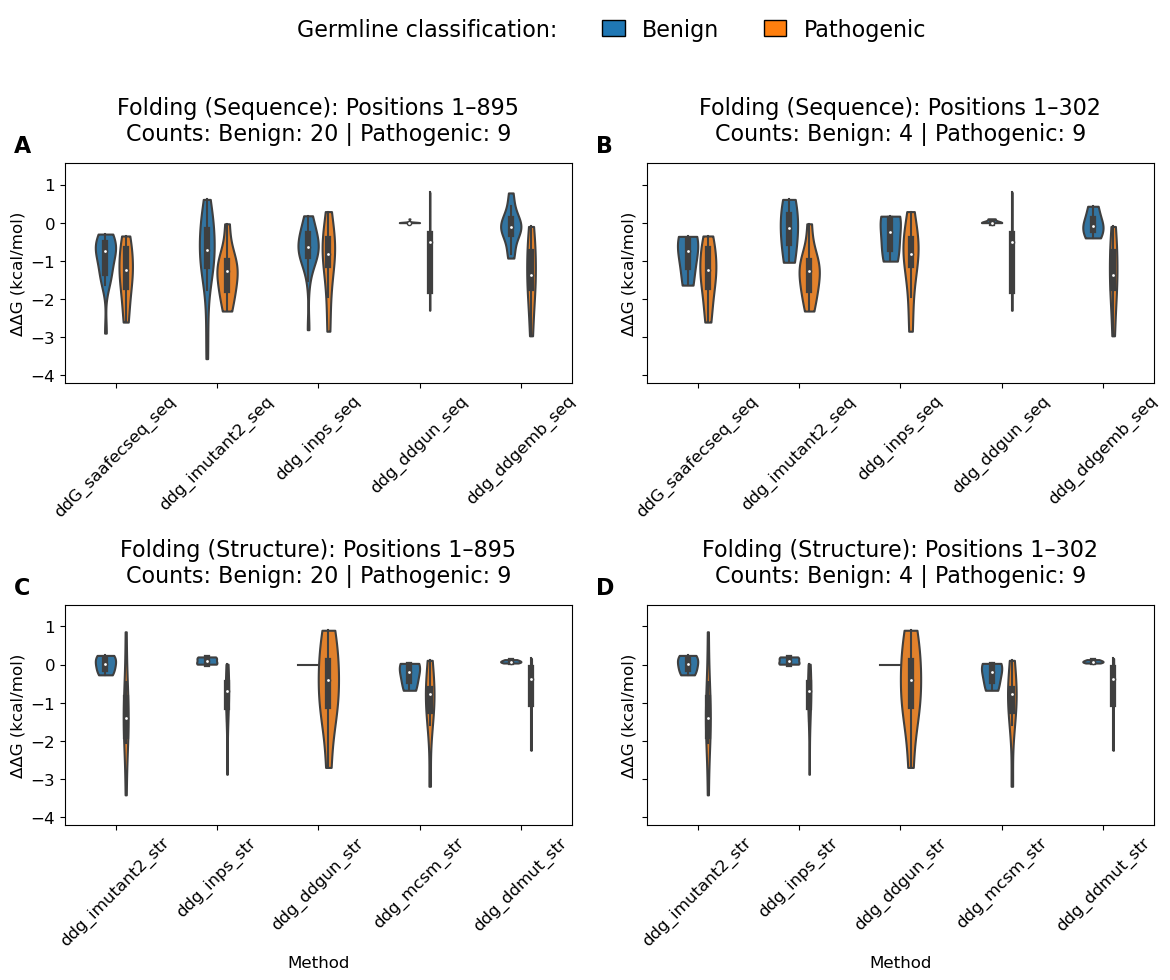

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from matplotlib.patches import Patch

# ——— Configuration ———
file_path           = "00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx"
output_dir          = "02_folding/10_output/250522_seq_str"
fig_width           = 12
fig_height          = 10
font_size           = 12
panel_letter_size   = 16
title_fontsize      = 16
legend_fontsize     = 16   # default for Germline legend
hspace              = 0.6   # vertical space between rows
wspace              = 0.5   # horizontal space between columns
pad_inches          = 0.1
rect_params         = [0, 0.03, 1, 0.94]  # leave more room at top for legend

os.makedirs(output_dir, exist_ok=True)

# ——— Helper function ———
def add_germline_legend(fig, palette, fontsize, y=1.02):
    """
    Adds a single-line Germline classification legend to `fig`.
    `palette` is a dict mapping 'Benign'/'Pathogenic' to colors.
    `fontsize` controls legend text size.
    `y` is the vertical position (in figure coordinates).
    """
    header = Patch(facecolor='none', edgecolor='none',
                   label='Germline classification:')
    ben_handle  = Patch(facecolor=palette['Benign'], edgecolor='black',
                        label='Benign')
    path_handle = Patch(facecolor=palette['Pathogenic'], edgecolor='black',
                        label='Pathogenic')

    fig.legend(
        handles=[header, ben_handle, path_handle],
        labels=[h.get_label() for h in (header, ben_handle, path_handle)],
        loc='upper center',
        ncol=3,
        frameon=False,
        bbox_to_anchor=(0.5, y),
        fontsize=fontsize,
        handlelength=1
    )

# Load data
df = pd.read_excel(file_path, sheet_name=0)

# Identify sequence- and structure-based ΔΔG columns
ddg_seq_cols = [c for c in df.columns if re.match(r'(?i)^ddg.*seq$', c)]
ddg_str_cols = [c for c in df.columns if re.match(r'(?i)^ddg.*str$', c)]

# Compute global y-limits
all_vals = df[ddg_seq_cols + ddg_str_cols].to_numpy().flatten()
all_vals = all_vals[~pd.isna(all_vals)]
y_min, y_max = all_vals.min(), all_vals.max()

# Classes + palette
classes = ['Benign', 'Pathogenic']
palette = {'Benign': 'tab:blue', 'Pathogenic': 'tab:orange'}

# Apply base font size
plt.rcParams.update({'font.size': font_size})

# Create 2×2 grid
fig, axes = plt.subplots(2, 2,
                         figsize=(fig_width, fig_height),
                         sharey=True)
fig.subplots_adjust(hspace=hspace, wspace=wspace)

# Panel definitions
panels = [
    (axes[0,0], ddg_seq_cols, "Folding (Sequence): Positions 1–895", 1, 895, 'A'),
    (axes[0,1], ddg_seq_cols, "Folding (Sequence): Positions 1–302", 1, 302, 'B'),
    (axes[1,0], ddg_str_cols, "Folding (Structure): Positions 1–895", 1, 895, 'C'),
    (axes[1,1], ddg_str_cols, "Folding (Structure): Positions 1–302", 1, 302, 'D'),
]

for ax, cols, title, lo, hi, letter in panels:
    sub = df[df.position.between(lo, hi) &
             df['Germline classification'].isin(classes)]
    counts    = sub['Germline classification'].value_counts()
    count_str = " | ".join(f"{c}: {counts.get(c,0)}"
                           for c in classes)
    long = sub.melt(
        id_vars=['Germline classification'],
        value_vars=cols,
        var_name='Method',
        value_name='ΔΔG'
    )

    sns.violinplot(
        data=long, x='Method', y='ΔΔG',
        hue='Germline classification',
        palette=palette, inner='box',
        cut=0, width=0.4, dodge=True,
        ax=ax
    )

    # Subplot letter
    ax.text(-0.1, 1.05, letter,
            transform=ax.transAxes,
            fontsize=panel_letter_size,
            fontweight='bold')

    # Title and formatting
    ax.set_title(f"{title}\nCounts: {count_str}",
                 pad=16, fontsize=title_fontsize)
    ax.set_xlabel("")  # only bottom row will have labels
    ax.set_ylabel("ΔΔG (kcal/mol)")
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(y_min, y_max)

    if ax.get_legend():
        ax.get_legend().remove()

# Bottom-row x-labels
for ax in axes[1, :]:
    ax.set_xlabel("Method")

# Add the Germline classification legend
add_germline_legend(fig, palette, legend_fontsize, y=1.02)

# Final layout and save
plt.tight_layout(rect=rect_params)
print(f"Figure size (inches): {fig.get_size_inches()}")
print(f"Base font size: {plt.rcParams['font.size']}")

out_path = os.path.join(output_dir,
                        "folding_sequence_structure_composite.png")
fig.savefig(out_path,
            dpi=300,
            bbox_inches='tight',
            pad_inches=pad_inches)
plt.show()

fig.savefig(
    out_path,
    dpi=300,
    bbox_inches='tight',
    pad_inches=pad_inches
)

plt.close(fig)


Figure size (inches): [12. 10.]
Base font size: 12.0


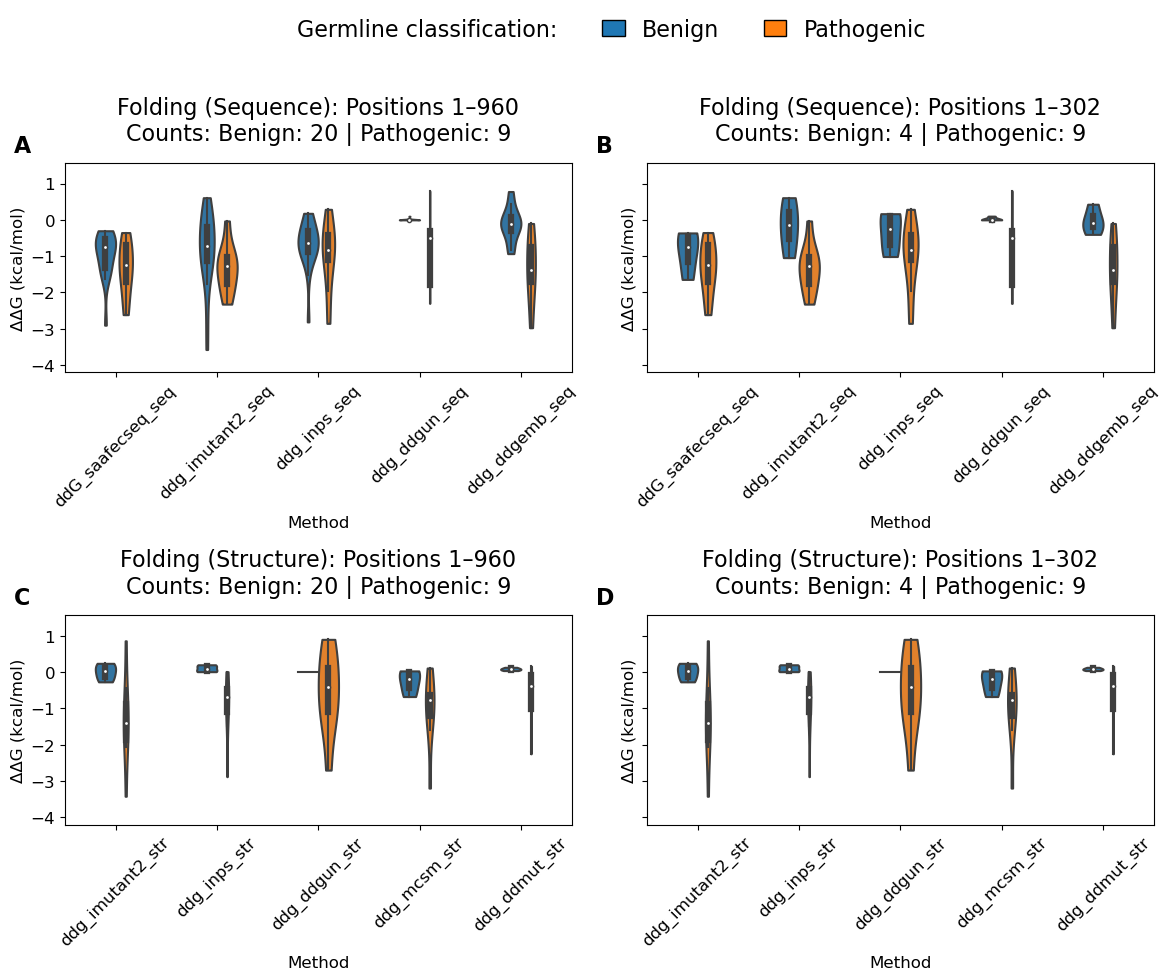

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from matplotlib.patches import Patch

# ——— Configuration ———
file_path           = "00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx"
output_dir          = "02_folding/10_output/250522_seq_str"
fig_width           = 12
fig_height          = 10
font_size           = 12
panel_letter_size   = 16
title_fontsize      = 16
legend_fontsize     = 16   # legend text size
hspace              = 0.6   # vertical space between rows
wspace              = 0.5   # horizontal space between columns
pad_inches          = 0.1
rect_params         = [0, 0.03, 1, 0.94]  # leave more room at top for legend

os.makedirs(output_dir, exist_ok=True)

# ——— Helper function ———
def add_germline_legend(fig, palette, fontsize, y=1.02):
    header = Patch(facecolor='none', edgecolor='none',
                   label='Germline classification:')
    ben_handle  = Patch(facecolor=palette['Benign'], edgecolor='black',
                        label='Benign')
    path_handle = Patch(facecolor=palette['Pathogenic'], edgecolor='black',
                        label='Pathogenic')

    fig.legend(
        handles=[header, ben_handle, path_handle],
        labels=[h.get_label() for h in (header, ben_handle, path_handle)],
        loc='upper center',
        ncol=3,
        frameon=False,
        bbox_to_anchor=(0.5, y),
        fontsize=fontsize,
        handlelength=1
    )

# Load data
df = pd.read_excel(file_path, sheet_name=0)

# Identify sequence- and structure-based ΔΔG columns
ddg_seq_cols = [c for c in df.columns if re.match(r'(?i)^ddg.*seq$', c)]
ddg_str_cols = [c for c in df.columns if re.match(r'(?i)^ddg.*str$', c)]

# Compute global y-limits
all_vals = df[ddg_seq_cols + ddg_str_cols].to_numpy().flatten()
all_vals = all_vals[~pd.isna(all_vals)]
y_min, y_max = all_vals.min(), all_vals.max()

# Classes + palette
classes = ['Benign', 'Pathogenic']
palette = {'Benign': 'tab:blue', 'Pathogenic': 'tab:orange'}

# Apply base font size
plt.rcParams.update({'font.size': font_size})

# Create 2×2 grid
fig, axes = plt.subplots(
    nrows=2, ncols=2,
    figsize=(fig_width, fig_height),
    sharey=True
)
fig.subplots_adjust(hspace=hspace, wspace=wspace)

# Panel definitions
panels = [
    (axes[0,0], ddg_seq_cols, "Folding (Sequence): Positions 1–960", 1, 895, 'A'),
    (axes[0,1], ddg_seq_cols, "Folding (Sequence): Positions 1–302", 1, 302, 'B'),
    (axes[1,0], ddg_str_cols, "Folding (Structure): Positions 1–960", 1, 895, 'C'),
    (axes[1,1], ddg_str_cols, "Folding (Structure): Positions 1–302", 1, 302, 'D'),
]

for ax, cols, title, lo, hi, letter in panels:
    sub = df[df.position.between(lo, hi) &
             df['Germline classification'].isin(classes)]
    counts    = sub['Germline classification'].value_counts()
    count_str = " | ".join(f"{c}: {counts.get(c,0)}"
                           for c in classes)
    long = sub.melt(
        id_vars=['Germline classification'],
        value_vars=cols,
        var_name='Method',
        value_name='ΔΔG'
    )
    sns.violinplot(
        data=long, x='Method', y='ΔΔG',
        hue='Germline classification',
        palette=palette, inner='box',
        cut=0, width=0.4, dodge=True,
        ax=ax
    )
    # Subplot letter
    ax.text(-0.1, 1.05, letter,
            transform=ax.transAxes,
            fontsize=panel_letter_size,
            fontweight='bold')
    # Title
    ax.set_title(f"{title}\nCounts: {count_str}",
                 pad=16, fontsize=title_fontsize)
    # X-label on every panel now
    ax.set_xlabel("Method", fontsize=font_size)
    ax.set_ylabel("ΔΔG (kcal/mol)")
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(y_min, y_max)
    if ax.get_legend():
        ax.get_legend().remove()

# Add the Germline classification legend
add_germline_legend(fig, palette, legend_fontsize, y=1.02)

# Final layout and save
plt.tight_layout(rect=rect_params)
print(f"Figure size (inches): {fig.get_size_inches()}")
print(f"Base font size: {plt.rcParams['font.size']}")

out_path = os.path.join(output_dir,
                        "folding_sequence_structure_composite.png")
fig.savefig(out_path,
            dpi=300,
            bbox_inches='tight',
            pad_inches=pad_inches)
plt.show()
plt.close(fig)


In [9]:
import pandas as pd
import re
import os

# ——— Configuration ———
file_path   = "00_data/01_cdkl5_clinvar_gaf_1kgp_hctr_comb_unq_af.xlsx"
output_dir  = "02_folding/10_output/250522_seq_str"
excel_name  = "cdkl5_folding_ddg_summary_table.xlsx"
output_excel = os.path.join(output_dir, excel_name)

# Ensure output folder exists
os.makedirs(output_dir, exist_ok=True)

# ——— Load data ———
df = pd.read_excel(file_path)

# ——— Identify ΔΔG columns ———
ddg_seq_cols = [c for c in df.columns if re.match(r'(?i)^ddg.*seq$', c)]
ddg_str_cols = [c for c in df.columns if re.match(r'(?i)^ddg.*str$', c)]

# ——— Classes ———
classes = ['Benign', 'Pathogenic']

# ——— Summary-collection helper ———
def collect_ddg_summary(df, cols, region_lo, region_hi, region_label, method_type):
    rows = []
    sub = df[df.position.between(region_lo, region_hi) &
             df['Germline classification'].isin(classes)]
    for col in cols:
        for cls in classes:
            vals = sub.loc[sub['Germline classification'] == cls, col].dropna()
            if len(vals) == 0:
                continue
            rows.append({
                'Method':  col,
                'Type':    method_type,
                'Region':  region_label,
                'Class':   cls,
                'n':       len(vals),
                'Mean':    round(vals.mean(),  3),
                'Median':  round(vals.median(),3),
                'Std':     round(vals.std(),   3),
                'Min':     round(vals.min(),   3),
                'Max':     round(vals.max(),   3),
            })
    return rows

# ——— Gather all summaries ———
all_rows = []
all_rows += collect_ddg_summary(df, ddg_seq_cols, 1, 895, "Full",      "Sequence")
all_rows += collect_ddg_summary(df, ddg_seq_cols, 1, 302, "Kinase",    "Sequence")
all_rows += collect_ddg_summary(df, ddg_str_cols, 1, 895, "Full",      "Structure")
all_rows += collect_ddg_summary(df, ddg_str_cols, 1, 302, "Kinase",    "Structure")

# ——— Build DataFrame, save, and print ———
summary_df = pd.DataFrame(all_rows)

# Save alongside the figure
summary_df.to_excel(output_excel, index=False)
print(f"⮕ Saved summary table to {output_excel}\n")

# Print for manual copy-paste
print("===== CDKL5 ΔΔG Summary Table =====")
print(summary_df.to_string(index=False))


⮕ Saved summary table to 02_folding/10_output/250522_seq_str/cdkl5_folding_ddg_summary_table.xlsx

===== CDKL5 ΔΔG Summary Table =====
           Method      Type Region      Class  n   Mean  Median   Std    Min    Max
ddG_saafecseq_seq  Sequence   Full     Benign 20 -0.948  -0.755 0.618 -2.900 -0.300
ddG_saafecseq_seq  Sequence   Full Pathogenic  9 -1.341  -1.250 0.732 -2.610 -0.350
 ddg_imutant2_seq  Sequence   Full     Benign 20 -0.800  -0.720 1.022 -3.570  0.610
 ddg_imutant2_seq  Sequence   Full Pathogenic  9 -1.332  -1.280 0.672 -2.320 -0.030
     ddg_inps_seq  Sequence   Full     Benign 20 -0.672  -0.630 0.662 -2.810  0.180
     ddg_inps_seq  Sequence   Full Pathogenic  9 -0.978  -0.820 0.940 -2.850  0.290
    ddg_ddgun_seq  Sequence   Full     Benign 20  0.005   0.000 0.022  0.000  0.100
    ddg_ddgun_seq  Sequence   Full Pathogenic  9 -0.889  -0.500 1.075 -2.300  0.800
   ddg_ddgemb_seq  Sequence   Full     Benign 20 -0.114  -0.105 0.460 -0.930  0.780
   ddg_ddgemb_seq  Sequen